#1. Linear Regression

## 1.1: Simple Linear Regression

Explanation: This chart visualizes Simple Linear Regression (SLR). This is used when we have only one feature to predict a continuous output . The plot shows the raw data (scatter points) and the "best fit line" that the model has learned, minimizing the error between the line and the points.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set a style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Visualization 1.1: Simple Linear Regression

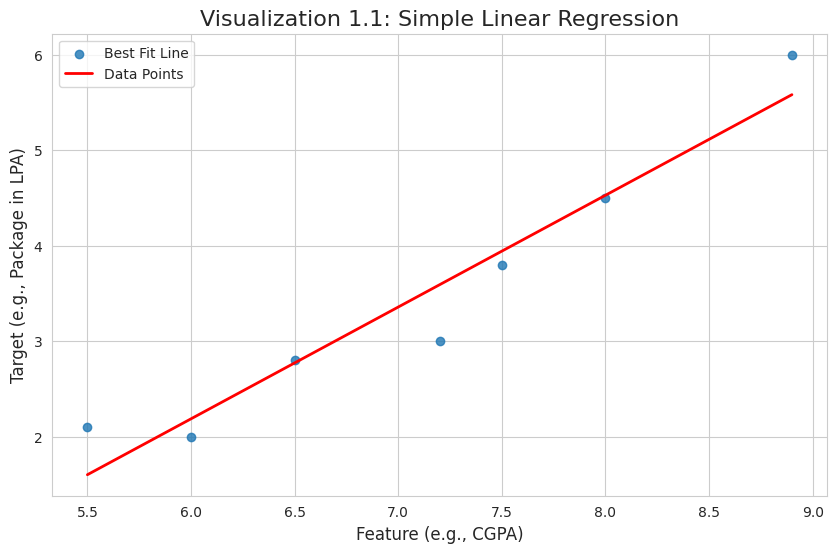

In [6]:
# 1. Create example data
# (e.g., CGPA vs. Package [cite: 17])
X_slr = np.array([6.0, 7.2, 8.9, 5.5, 8.0, 6.5, 7.5])
y_slr = np.array([2.0, 3.0, 6.0, 2.1, 4.5, 2.8, 3.8])

# 2. Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_slr, y=y_slr, ci=None, line_kws={'color':'red', 'lw':2})

# 3. Set titles and labels
plt.title("Visualization 1.1: Simple Linear Regression", fontsize=16)
plt.xlabel("Feature (e.g., CGPA)", fontsize=12)
plt.ylabel("Target (e.g., Package in LPA)", fontsize=12)
plt.legend(['Best Fit Line', 'Data Points'])
plt.show()

##Visualization 1.2: Multiple Linear Regression (Pair Plot)

Explanation: When you have multiple input variables (like in Multiple Linear Regression ), a 3D plot can be hard to read. A pair plot is an excellent alternative. It shows a grid where each "cell" is a scatter plot of one feature against another. The diagonal shows the distribution (histogram) of that single feature. It's a great way to spot relationships between all variables at once.

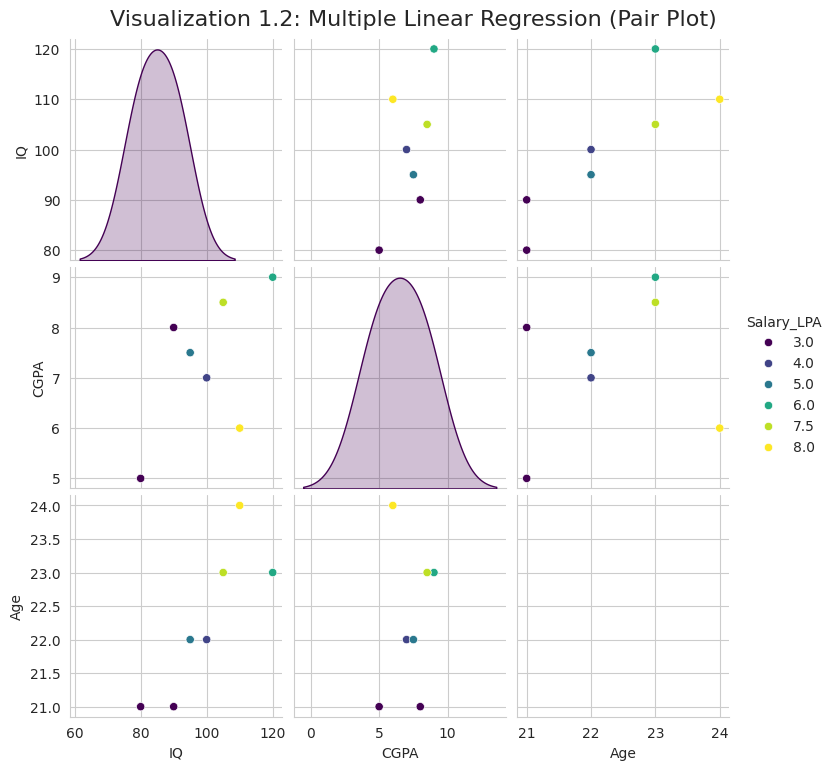

In [7]:
# --- Visualization 1.2: Multiple Linear Regression (Pair Plot) ---

# 1. Create example data
# (e.g., Salary predicted by IQ, CGPA, and Age)
data_mlr = {
    'Salary_LPA': [3.0, 4.0, 8.0, 6.0, 3.0, 5.0, 7.5],
    'IQ': [90, 100, 110, 120, 80, 95, 105],
    'CGPA': [8.0, 7.0, 6.0, 9.0, 5.0, 7.5, 8.5],
    'Age': [21, 22, 24, 23, 21, 22, 23]
}
df_mlr = pd.DataFrame(data_mlr)

# 2. Create the plot
# We plot all features against each other, with the target 'Salary_LPA'
# highlighted by color (hue).
g = sns.pairplot(df_mlr, hue='Salary_LPA', palette='viridis')

# 3. Set title
g.fig.suptitle("Visualization 1.2: Multiple Linear Regression (Pair Plot)", y=1.02, fontsize=16)
plt.show()

##Visualization 1.3: Polynomial Regression

Explanation: Standard linear regression fails when the data has a non-linear relationship.

Polynomial regression  solves this by fitting a curved line. This plot shows a clear non-linear trend that a straight line (like in 1.1) would miss, but a polynomial model captures well.

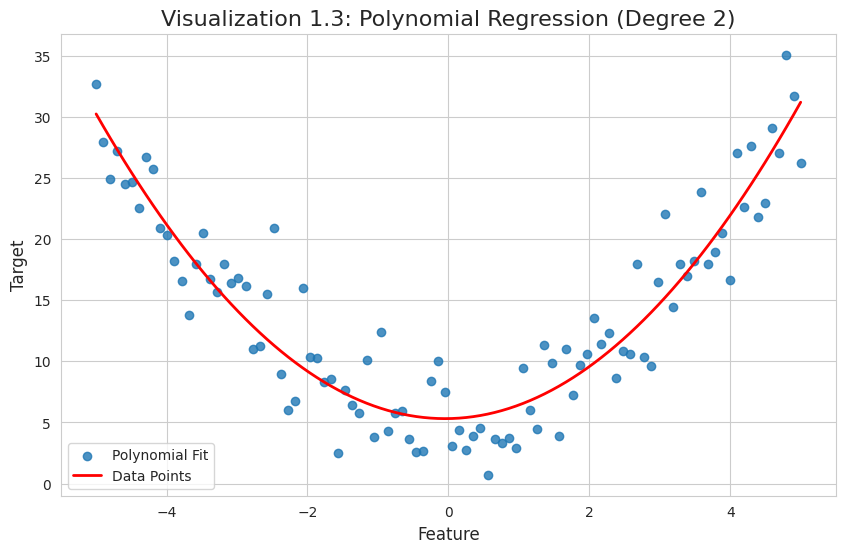

In [8]:
# --- Visualization 1.3: Polynomial Regression ---

# 1. Create example non-linear data
X_poly = np.linspace(-5, 5, 100)
y_poly = X_poly**2 + np.random.randn(100) * 3 + 5  # A clear parabola

# 2. Create the plot
plt.figure(figsize=(10, 6))
# 'order=2' tells seaborn to fit a 2nd-degree polynomial (a curve)
sns.regplot(x=X_poly, y=y_poly, order=2, ci=None, line_kws={'color':'red', 'lw':2})

# 3. Set titles and labels
plt.title("Visualization 1.3: Polynomial Regression (Degree 2)", fontsize=16)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Target", fontsize=12)
plt.legend(['Polynomial Fit', 'Data Points'])
plt.show()

##Visualization 1.4: Loss Function Surface (MSE)

Explanation: This is a more advanced but crucial visualization. Our goal is to find the best parameters (m and c) that give the minimum loss (error).

This 3D plot shows all possible values for m (slope) and c (intercept) on the X and Y axes, and the resulting MSE (error) on the Z-axis. The "global minimum"  is the bottom of this bowl, which is the point Gradient Descent iteratively "walks down" to find.

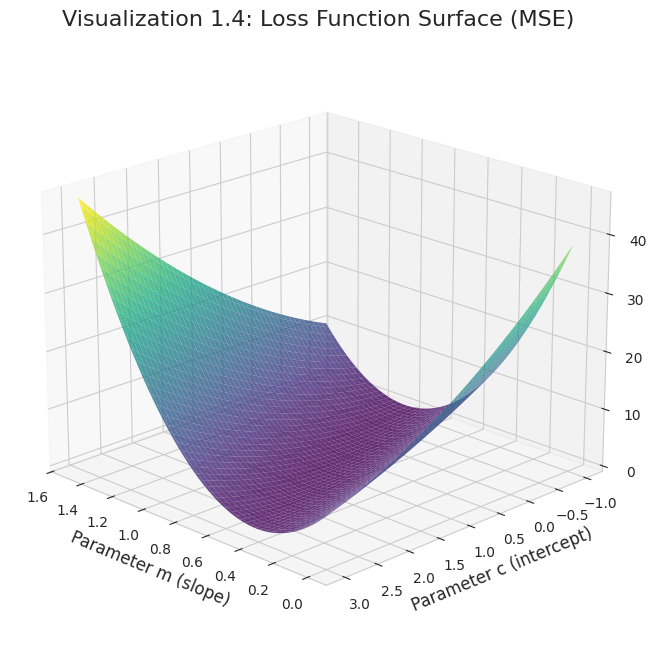

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# --- Visualization 1.4: Loss Function Surface (MSE) ---

# 1. Use the data from 1.1 (SLR)
# True values: Let's assume true m=0.5, true c=1
X_true = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_true = np.array([1.5, 2.2, 2.8, 3.6, 4.5, 5.1, 5.9, 6.7, 7.5, 8.2])

# 2. Create a grid of possible m and c values
m_vals = np.linspace(0.0, 1.5, 100)
c_vals = np.linspace(-1.0, 3.0, 100)
M, C = np.meshgrid(m_vals, c_vals)

# 3. Calculate Loss (MSE) for every (m, c) pair
Z = np.zeros(M.shape)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * X_true + C[i, j]
        Z[i, j] = np.mean((y_pred - y_true)**2)

# 4. Create the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# 5. Set titles and labels
ax.set_title("Visualization 1.4: Loss Function Surface (MSE)", fontsize=16)
ax.set_xlabel("Parameter m (slope)", fontsize=12)
ax.set_ylabel("Parameter c (intercept)", fontsize=12)
ax.set_zlabel("Loss (MSE)", fontsize=12)
ax.view_init(elev=20, azim=135) # Rotate for a good viewplt.show()


# 2 Regression Diagnostics & Regularization


In [10]:
# General setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_diabetes
import scipy.stats as stats

# Set a professional style for the book
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Visualization 2.1: Assumption 1: Linearity

**Explanation:** The first assumption of linear regression is a linear relationship between the features and the target. This scatter plot helps us visually check this. We want to see a general line-like trend, not a U-shape or other clear non-linear pattern.

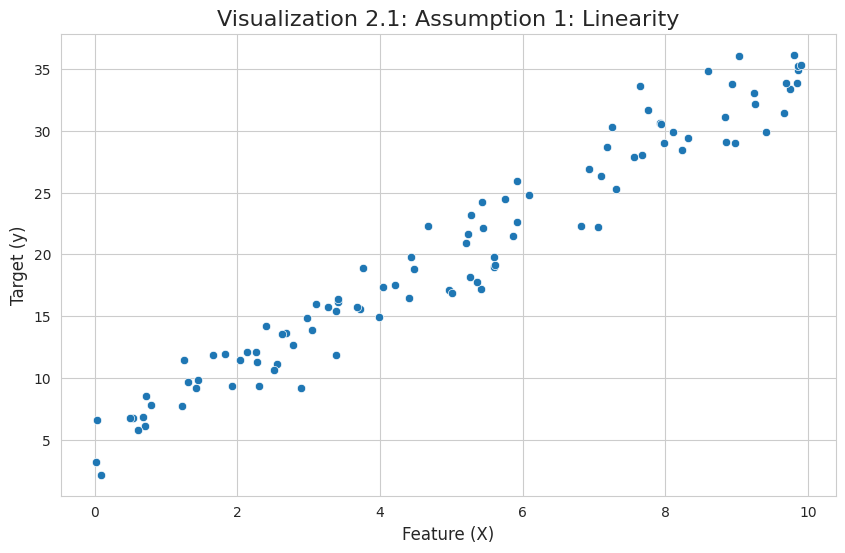

In [11]:
# 1. Create example data
# (A clear linear relationship)
X_linear = np.random.rand(100) * 10
y_linear = 3 * X_linear + np.random.randn(100) * 2 + 5

# 2. Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_linear, y=y_linear)

# 3. Set titles and labels
plt.title("Visualization 2.1: Assumption 1: Linearity", fontsize=16)
plt.xlabel("Feature (X)", fontsize=12)
plt.ylabel("Target (y)", fontsize=12)
plt.show()

## Visualization 2.2: Assumption 2: No Multicollinearity

**Explanation:** "No Multicollinearity" as a key assumption. This means our features should not be highly correlated with *each other*. A correlation heatmap is the standard way to check this.

In this example, `Feature_1` and `Feature_3` are intentionally created to be highly correlated (0.98), which would be a problem for a model.

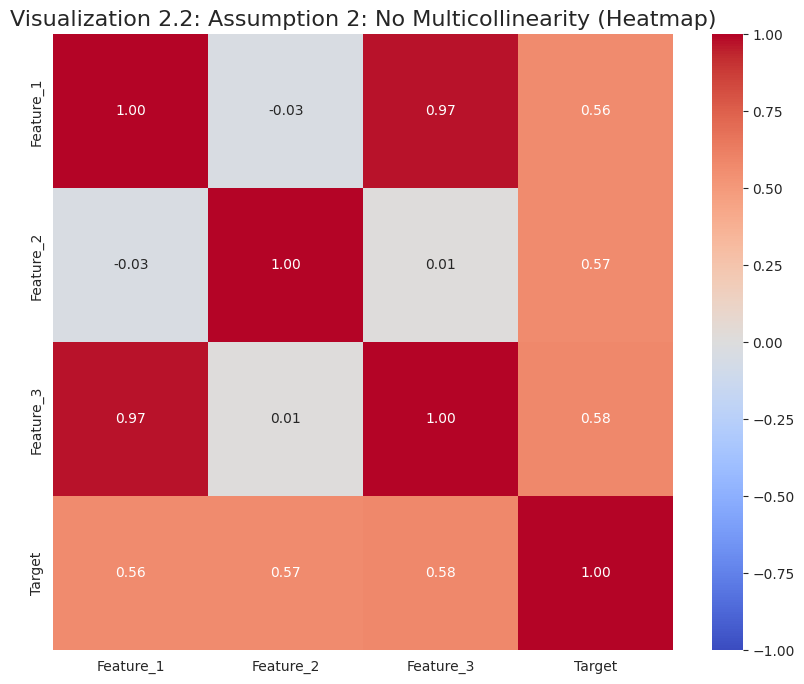

In [12]:
# 1. Create example data with multicollinearity
np.random.seed(42)
feature_1 = np.random.rand(100)
feature_2 = np.random.rand(100)
# Feature 3 is highly correlated with Feature 1
feature_3 = feature_1 * 1.5 + np.random.normal(0, 0.1, 100)
target = feature_1 + feature_2 + np.random.rand(100)

df_corr = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Target': target
})

# 2. Calculate the correlation matrix
corr_matrix = df_corr.corr()

# 3. Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# 4. Set titles and labels
plt.title("Visualization 2.2: Assumption 2: No Multicollinearity (Heatmap)", fontsize=16)
plt.show()

## Visualization 2.3: Assumption 3: Normality of Residuals

**Explanation:** This assumption states that the errors (residuals) of the model should be normally distributed. We check this in two ways:

1.  **Histogram (or KDE Plot):** The distribution of errors should look like a bell curve.
2.  **Q-Q Plot:** The error points should fall closely along the red diagonal line.

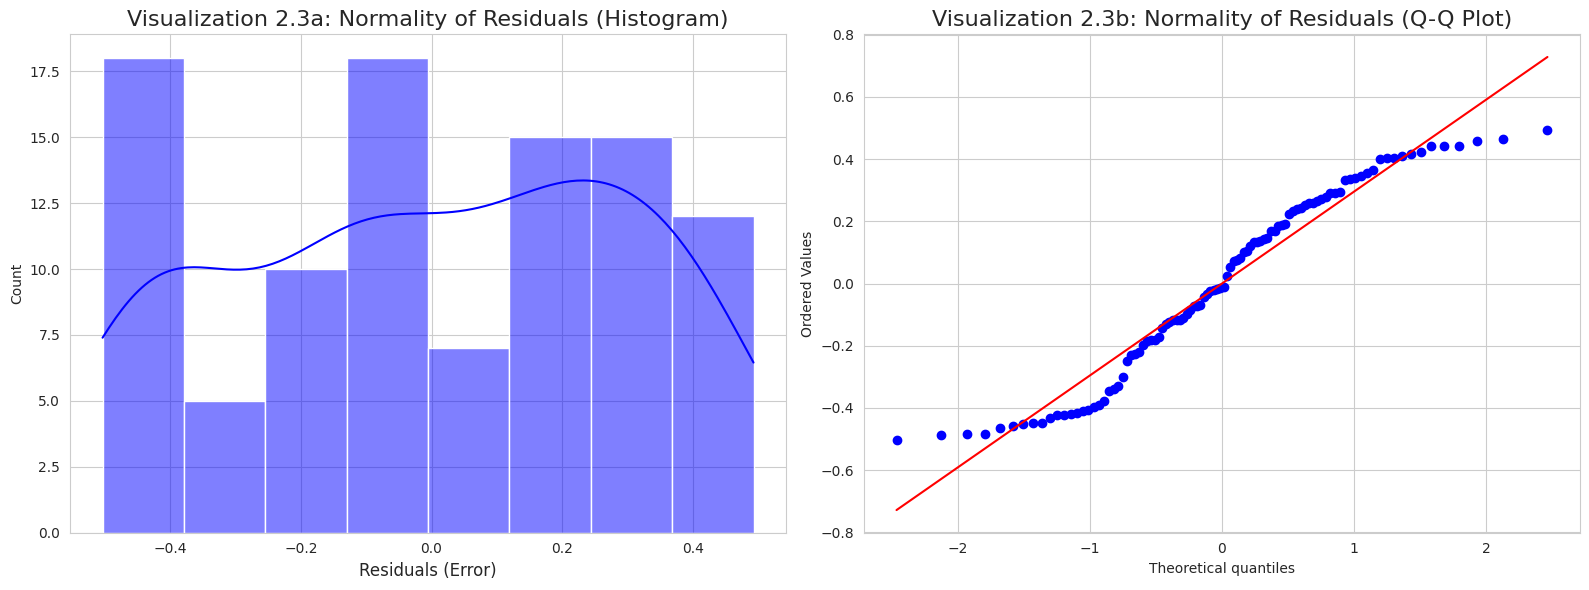

In [13]:
# 1. We need to fit a model to get residuals
# Let's use the data from 2.2, but drop the correlated feature
X_norm = df_corr[['Feature_1', 'Feature_2']]
y_norm = df_corr['Target']

model = LinearRegression()
model.fit(X_norm, y_norm)
y_pred = model.predict(X_norm)
residuals = y_norm - y_pred

# 2. Create the plots (in a 1x2 grid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Histogram of Residuals
sns.histplot(residuals, kde=True, ax=ax1, color='blue')
ax1.set_title("Visualization 2.3a: Normality of Residuals (Histogram)", fontsize=16)
ax1.set_xlabel("Residuals (Error)", fontsize=12)

# Plot 2: Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title("Visualization 2.3b: Normality of Residuals (Q-Q Plot)", fontsize=16)

plt.tight_layout()
plt.show()

## Visualization 2.4: Assumption 4: Homoscedasticity

**Explanation:** This assumption (also called "constant variance") means the spread of the residuals should be random and uniform as the predicted value changes. We check this by plotting the **Predicted Values vs. The Residuals**.

We are looking for a random cloud of points. If we see a pattern (like a cone/funnel or a U-shape), it's a sign of *heteroscedasticity*, which is a problem.

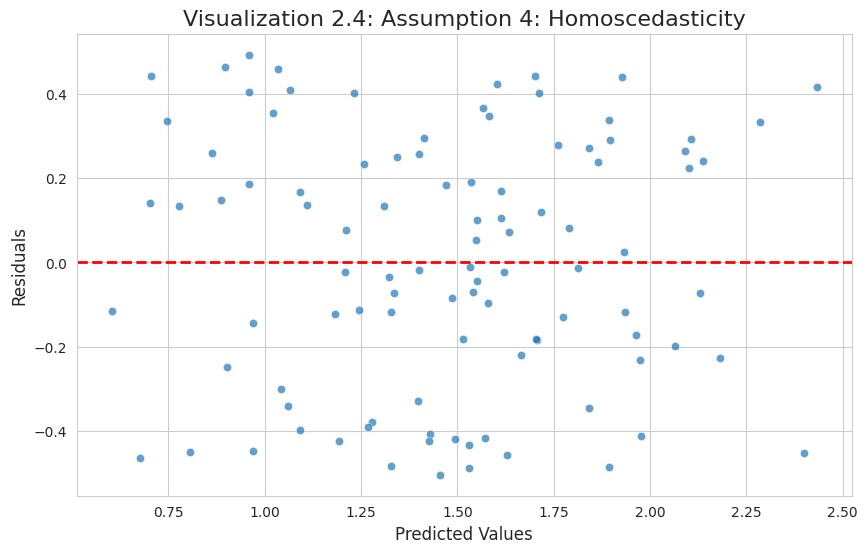

In [14]:
# 1. We use the 'y_pred' and 'residuals' from the previous step (2.3)

# 2. Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)

# 3. Add a horizontal line at y=0 (which is the 'no error' line)
plt.axhline(y=0, color='red', linestyle='--', lw=2)

# 4. Set titles and labels
plt.title("Visualization 2.4: Assumption 4: Homoscedasticity", fontsize=16)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.show()

## Visualization 2.5: Regularization: Coefficient Shrinkage

**Explanation:** This plot visualizes the effect of Ridge (L2) and Lasso (L1) regularization. As the regularization strength (`alpha`) increases (x-axis), the model coefficients (y-axis) are "shrunk" toward zero.

Notice the key difference: **Lasso** can shrink coefficients to *exactly zero* (see the green line), effectively performing feature selection. **Ridge** shrinks them *close* to zero, but they rarely ever become exactly zero.

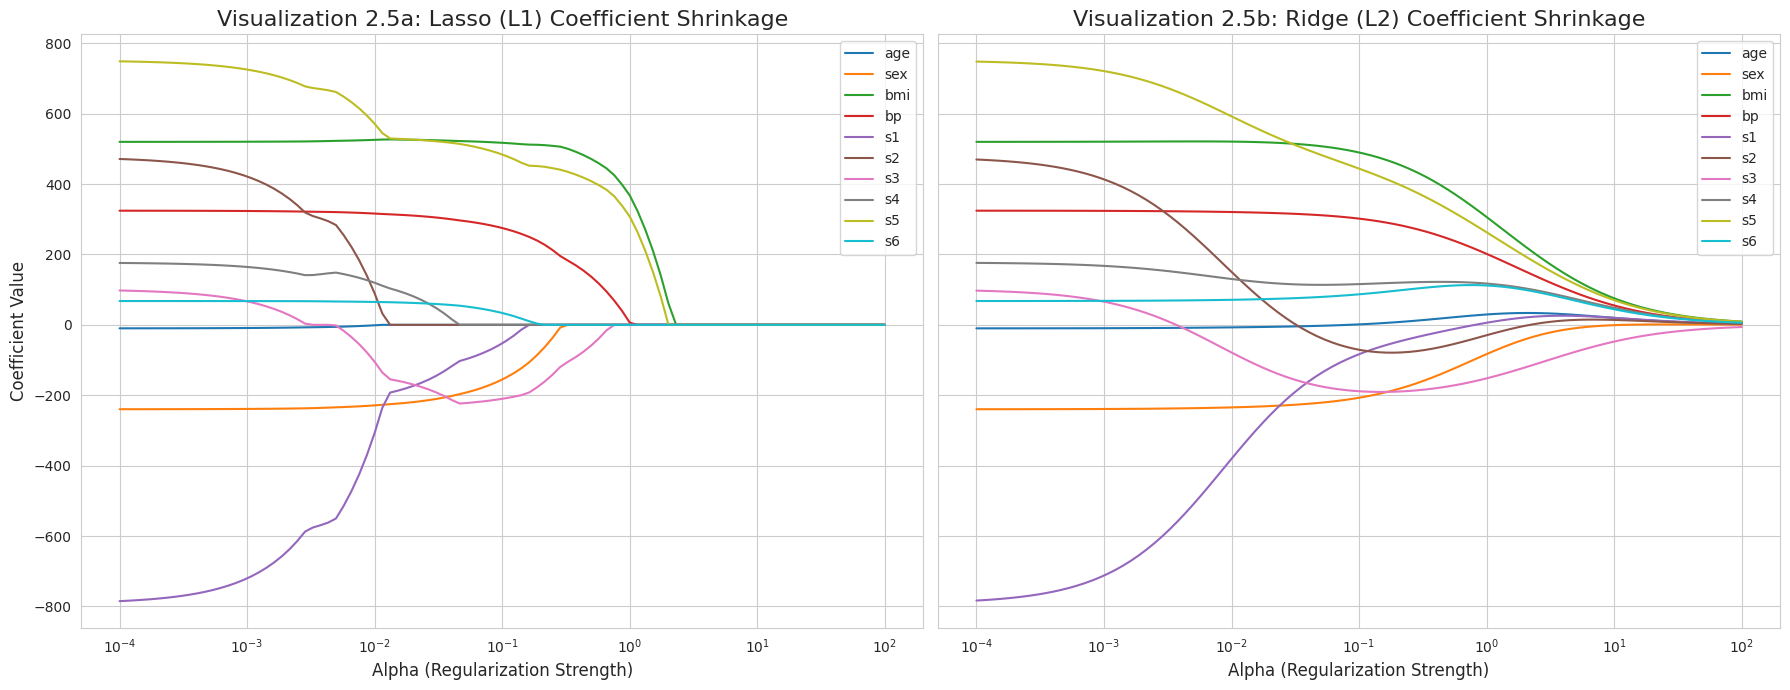

In [15]:
# 1. Load a standard dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
features = X.columns

# 2. Set up a range of alpha values
alphas = np.logspace(-4, 2, 100)

# 3. Store coefficients
coefs_lasso = []
coefs_ridge = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)

    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)

# 4. Create the plots (in a 1x2 grid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)

# Plot 1: Lasso (L1)
ax1.plot(alphas, coefs_lasso)
ax1.set_xscale('log')
ax1.set_title("Visualization 2.5a: Lasso (L1) Coefficient Shrinkage", fontsize=16)
ax1.set_xlabel("Alpha (Regularization Strength)", fontsize=12)
ax1.set_ylabel("Coefficient Value", fontsize=12)
ax1.legend(features, loc='upper right')

# Plot 2: Ridge (L2)
ax2.plot(alphas, coefs_ridge)
ax2.set_xscale('log')
ax2.set_title("Visualization 2.5b: Ridge (L2) Coefficient Shrinkage", fontsize=16)
ax2.set_xlabel("Alpha (Regularization Strength)", fontsize=12)
ax2.legend(features, loc='upper right')

plt.tight_layout()
plt.show()

## Visualization 2.6: The Bias-Variance Tradeoff

**Explanation:** This is a fundamental, conceptual plot in machine learning.
* **High Bias (Low Complexity):** A simple model (like SLR) *underfits* the data.
* **High Variance (High Complexity):** A complex model (like a high-degree polynomial) *overfits* the data.
* **The "Sweet Spot":** The optimal model is in the middle, where the **Total Error** (Bias² + Variance) is at its minimum.

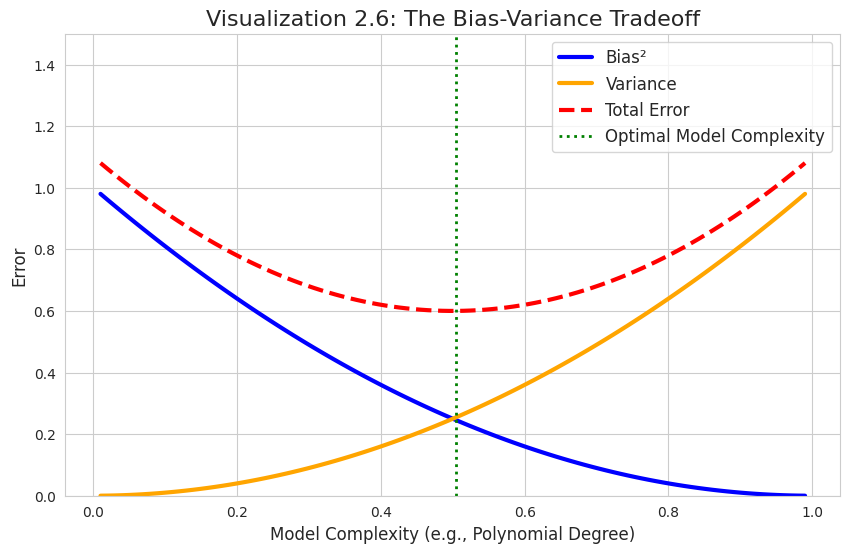

In [16]:
# 1. This is a conceptual plot, so we create synthetic data for the curves.
complexity = np.linspace(0.01, 0.99, 100)
bias_sq = (1 - complexity)**2
variance = complexity**2
total_error = bias_sq + variance + 0.1 # 0.1 represents irreducible error

# 2. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(complexity, bias_sq, label='Bias²', color='blue', lw=3)
plt.plot(complexity, variance, label='Variance', color='orange', lw=3)
plt.plot(complexity, total_error, label='Total Error', color='red', linestyle='--', lw=3)

# 3. Find and mark the optimal point
min_error_idx = np.argmin(total_error)
optimal_complexity = complexity[min_error_idx]
plt.axvline(x=optimal_complexity, color='green', linestyle=':', lw=2, label='Optimal Model Complexity')

# 4. Set titles and labels
plt.title("Visualization 2.6: The Bias-Variance Tradeoff", fontsize=16)
plt.xlabel("Model Complexity (e.g., Polynomial Degree)", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend(fontsize=12)
plt.ylim(0, 1.5)
plt.show()

# 3. Time Series Forecasting


In [17]:
# General setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Set a professional style for the book
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Visualization 3.1: Basic Time Series Plot

**Explanation:** The first step in any time series analysis is to simply plot the data over time. This "line plot" gives us an immediate holistic view of the data, allowing us to spot potential trends (upward/downward), seasonality (repeating patterns), or unusual events.

Here, we'll create a synthetic dataset that mimics monthly sales data with a clear upward trend and yearly seasonality.

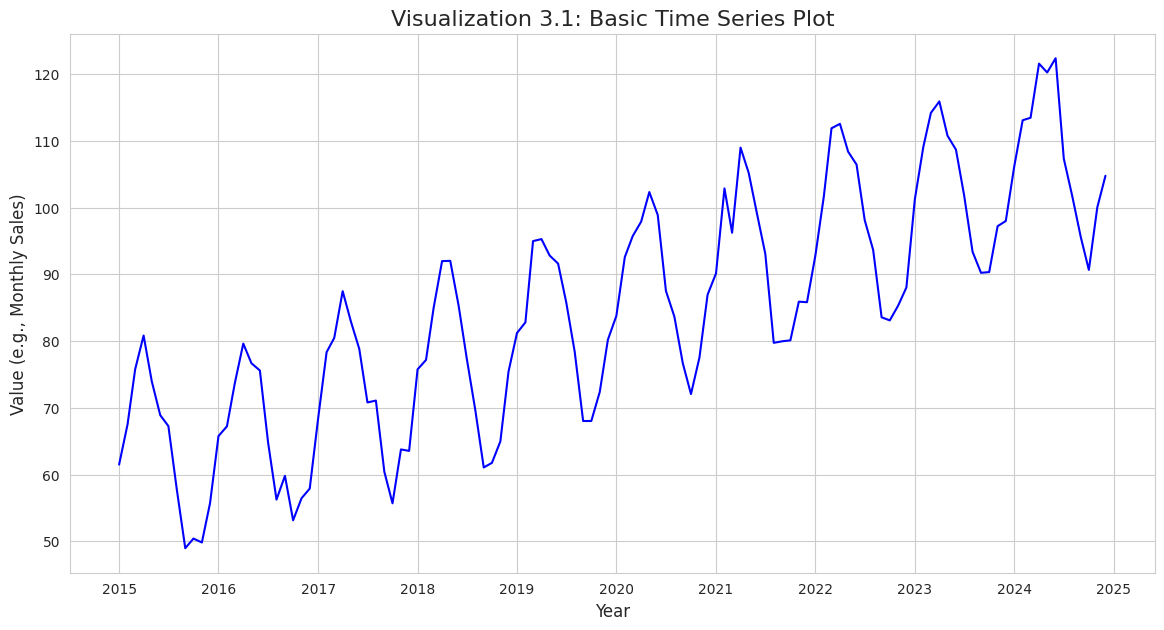

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Create example time series data
# (e.g., Monthly sales over 10 years)
date_rng = pd.date_range(start='2015-01-01', end='2024-12-31', freq='MS')
np.random.seed(42)

# Create a trend
trend = np.linspace(0, 50, num=len(date_rng))

# Create seasonality (high in summer, low in winter)
seasonality = 15 * np.sin(np.arange(len(date_rng)) * (2 * np.pi / 12)) + 10

# Create noise
noise = np.random.normal(0, 3, size=len(date_rng))

# Combine them
y_ts = trend + seasonality + noise + 50
ts_data = pd.Series(y_ts, index=date_rng)

# 2. Create the plot
plt.figure(figsize=(14, 7))
plt.plot(ts_data, color='blue')

# 3. Set titles and labels
plt.title("Visualization 3.1: Basic Time Series Plot", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (e.g., Monthly Sales)", fontsize=12)
plt.show()

## Visualization 3.2: Time Series Smoothing (Moving Average)

**Explanation:** Line plots can sometimes be difficult to understand due to noise. "Smoothing" techniques like a **Moving Average** help overcome this.

This plot shows the original (noisy) data overlaid with a 12-month rolling average. This smoothed line makes the long-term upward trend much clearer.

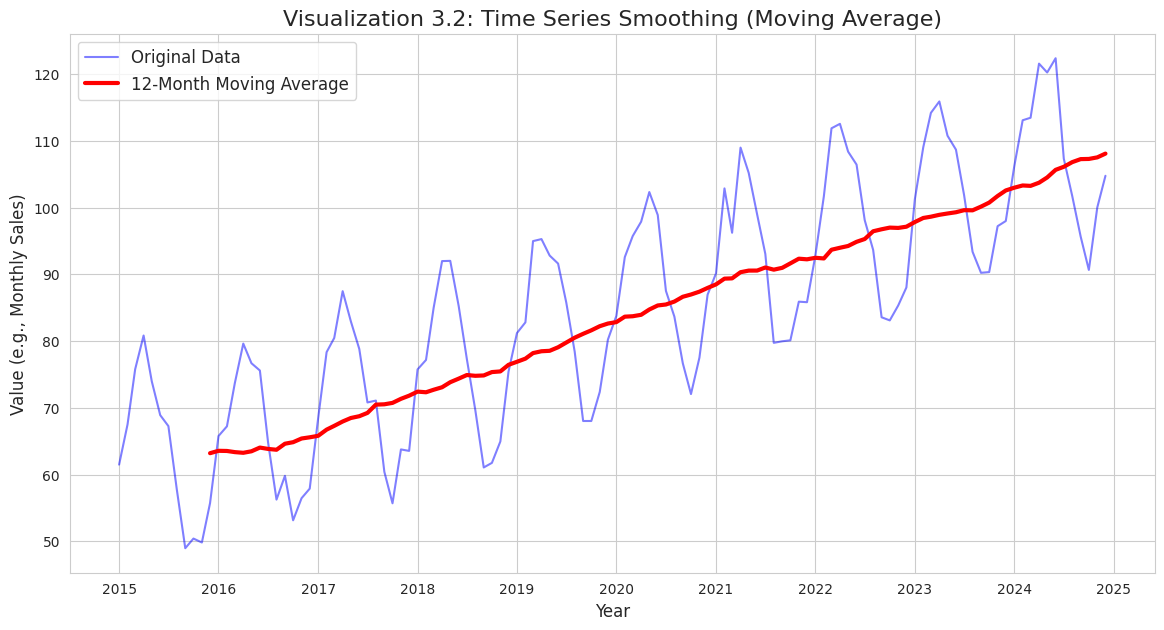

In [20]:
not# 1. We use the 'ts_data' from the previous step
# 2. Calculate a 12-month rolling average (window size = 12)
rolling_avg = ts_data.rolling(window=12).mean()

# 3. Create the plot
plt.figure(figsize=(14, 7))
plt.plot(ts_data, label='Original Data', color='blue', alpha=0.5)
plt.plot(rolling_avg, label='12-Month Moving Average', color='red', lw=3)

# 4. Set titles and labels
plt.title("Visualization 3.2: Time Series Smoothing (Moving Average)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (e.g., Monthly Sales)", fontsize=12)
plt.legend(fontsize=12)
plt.show()

## Visualization 3.3: Time Series Decomposition

**Explanation:** This is a crucial visualization. A time series can be broken down into three components: **Trend**, **Seasonality**, and **Residual (Noise)** .

This plot, generated by the `seasonal_decompose` function, creates four subplots:
1.  **Observed:** The original data (same as 3.1).
2.  **Trend:** The long-term upward movement.
3.  **Seasonal:** The repeating yearly pattern.
4.  **Resid:** The random noise left over after removing the trend and seasonality.

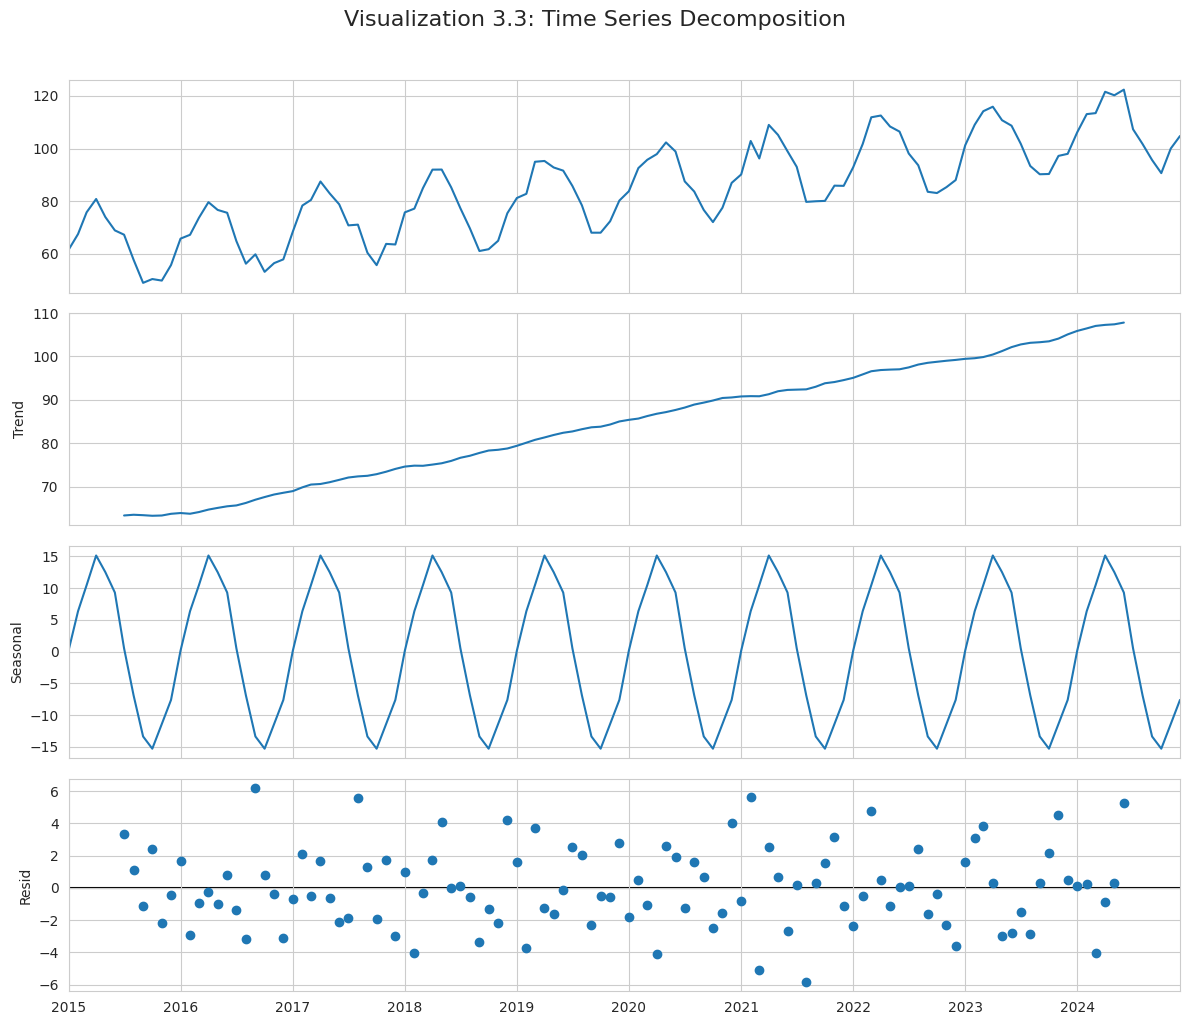

In [21]:
# 1. We use the 'ts_data' from 3.1
# 2. Perform decomposition using an additive model
# (since we added the components together)
decomposition = seasonal_decompose(ts_data, model='additive')

# 3. Create the plot
fig = decomposition.plot()
fig.set_size_inches(12, 10)
fig.suptitle("Visualization 3.3: Time Series Decomposition", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Visualization 3.4: Stationarity

**Explanation:** Many models (like AR, MA, ARMA) require the data to be **stationary**. Stationarity means the data's statistical properties (like mean and variance) do not change over time.

Our original data is **not stationary** (its mean clearly increases). A common way to make data stationary is by "differencing" (e.g., subtracting the previous month's value from the current month's value). This plot compares the two:
* **Top Plot:** The original, non-stationary data.
* **Bottom Plot:** The first-differenced data, which now looks stationary (it hovers around a constant mean).

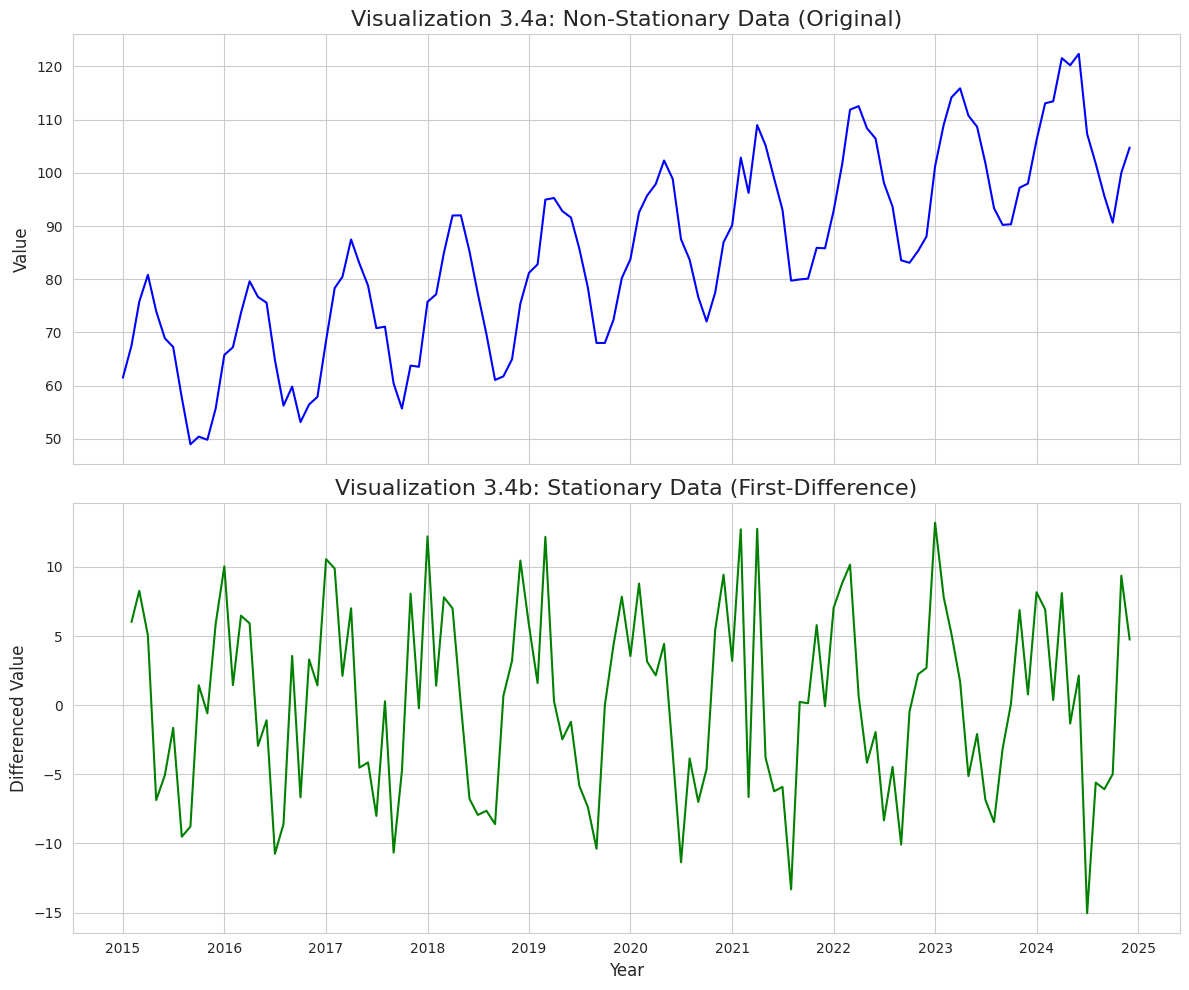

In [22]:
# 1. We use 'ts_data' from 3.1
# 2. Calculate the first-difference
ts_data_diff = ts_data.diff().dropna() # dropna() removes the first NaN value

# 3. Create the plots (in a 2x1 grid)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot 1: Original (Non-Stationary)
ax1.plot(ts_data, color='blue')
ax1.set_title("Visualization 3.4a: Non-Stationary Data (Original)", fontsize=16)
ax1.set_ylabel("Value", fontsize=12)

# Plot 2: First-Difference (Stationary)
ax2.plot(ts_data_diff, color='green')
ax2.set_title("Visualization 3.4b: Stationary Data (First-Difference)", fontsize=16)
ax2.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("Differenced Value", fontsize=12)

plt.tight_layout()
plt.show()

# 4. Classification Algorithms


In [23]:
# General setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

# Set a professional style for the book
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Visualization 4.1: The Sigmoid Function

**Explanation:** The algorithm uses a **Sigmoid function** to map any real-valued number into a probability between 0 and 1. This plot shows the characteristic "S-shape" of the function.

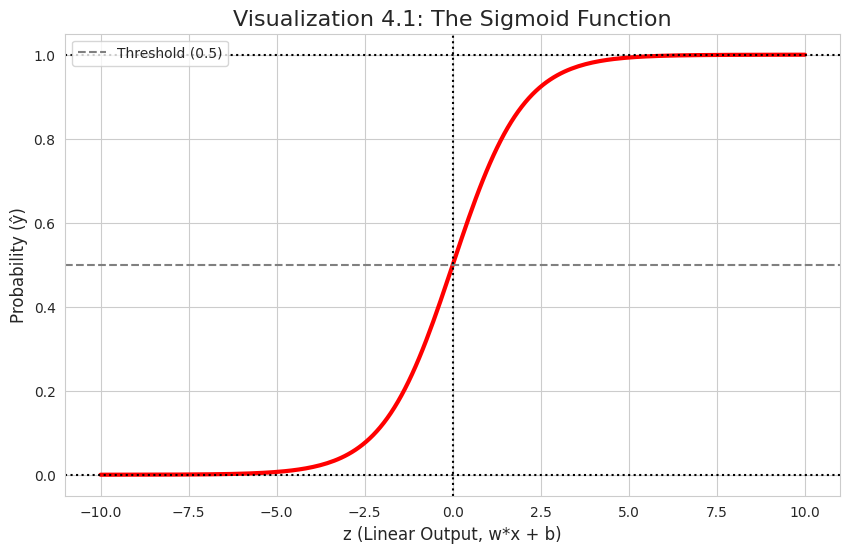

In [24]:
# 1. Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Create x values (z)
z = np.linspace(-10, 10, 200)
y_sig = sigmoid(z)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z, y_sig, color='red', lw=3)

# 4. Add key reference lines
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')
plt.axhline(y=1.0, color='black', linestyle=':')
plt.axhline(y=0.0, color='black', linestyle=':')
plt.axvline(x=0.0, color='black', linestyle=':')

# 5. Set titles and labels
plt.title("Visualization 4.1: The Sigmoid Function", fontsize=16)
plt.xlabel("z (Linear Output, w*x + b)", fontsize=12)
plt.ylabel("Probability (ŷ)", fontsize=12)
plt.legend()
plt.show()

## Visualization 4.2: Logistic Regression Decision Boundary

**Explanation:** This visualization shows the result of the sigmoid function in action. For a 2-feature classification problem, Logistic Regression learns a *linear* (straight line) decision boundary. Any point on one side of the line is classified as Class 0, and any point on the other side is classified as Class 1.

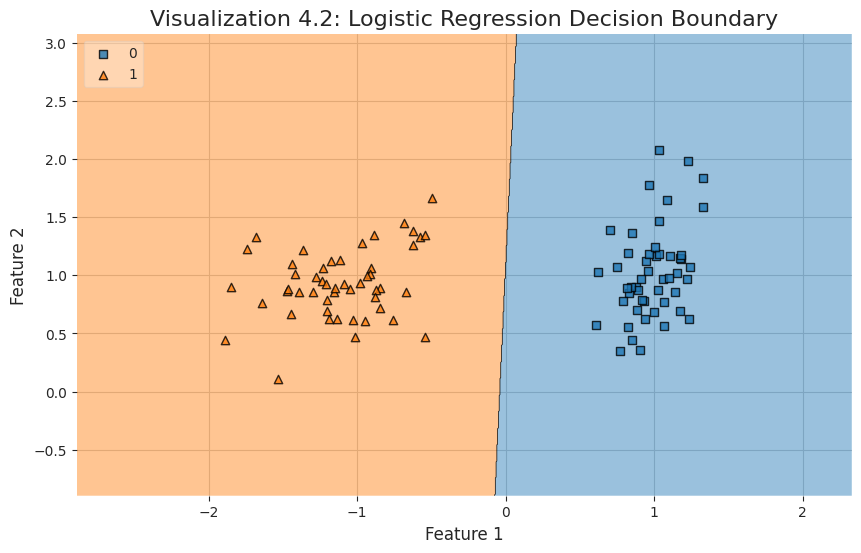

In [25]:
# 1. Create 2-class, linearly separable data
X_class, y_class = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                       n_informative=2, random_state=1,
                                       n_clusters_per_class=1)

# 2. Fit a Logistic Regression model
model_logreg = LogisticRegression()
model_logreg.fit(X_class, y_class)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_class, y_class, clf=model_logreg, legend=2)

# 4. Set titles and labels
plt.title("Visualization 4.2: Logistic Regression Decision Boundary", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

## Visualization 4.3: SVM: Maximum Margin Classifier

**Explanation:** This plot illustrates the core concept of a Support Vector Machine (SVM). The model finds the optimal hyperplane (the solid line) that **maximizes the margin** (the area between the dashed lines) between the two classes.

The data points that lie exactly on this margin are called the **Support Vectors** —they are the critical points that "support" the entire boundary.

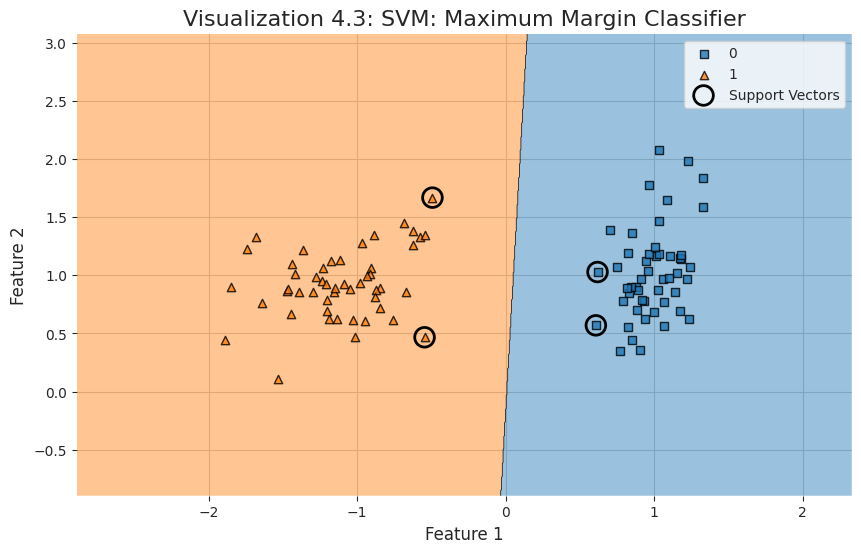

In [26]:
# 1. We use the same data from 4.2
# 2. Fit an SVM model with a linear kernel
model_svm = SVC(kernel='linear')
model_svm.fit(X_class, y_class)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_class, y_class, clf=model_svm, legend=2)

# 4. Highlight the support vectors
plt.scatter(model_svm.support_vectors_[:, 0],
            model_svm.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='black', lw=2, label='Support Vectors')

# 5. Set titles and labels
plt.title("Visualization 4.3: SVM: Maximum Margin Classifier", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.show()

## Visualization 4.4: SVM: The Kernel Trick

**Explanation:** What happens when data isn't linearly separable? The **Kernel Trick** implicitly maps the data to a higher dimension.

* **Top Plot (1D):** This data cannot be separated by a single point (a 1D "line").
* **Bottom Plot (2D):** By creating a new feature $x^2$, we map the data to 2D, where it becomes *linearly separable* by a hyperplane.

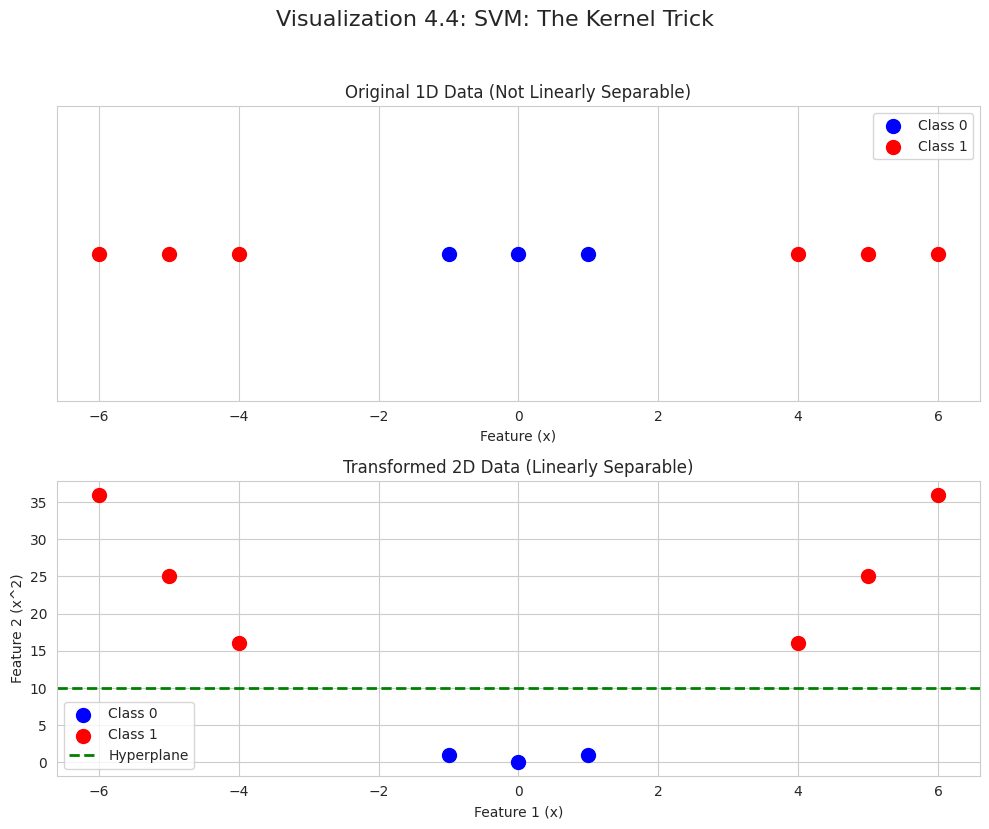

In [27]:
# 1. Create 1D non-linear data
X_1d = np.array([-6, -5, -4, -1, 0, 1, 4, 5, 6]).reshape(-1, 1)
y_1d = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1])

# 2. Create the 2D transformed data
X_2d_feat1 = X_1d.flatten()
X_2d_feat2 = X_2d_feat1**2 # The new feature, x^2

# 3. Create the plots (in a 2x1 grid)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle("Visualization 4.4: SVM: The Kernel Trick", fontsize=16, y=1.03)

# Plot 1: 1D Data (Not Linearly Separable)
ax1.scatter(X_1d[y_1d==0], np.zeros(np.sum(y_1d==0)), c='blue', label='Class 0', s=100)
ax1.scatter(X_1d[y_1d==1], np.zeros(np.sum(y_1d==1)), c='red', label='Class 1', s=100)
ax1.set_title("Original 1D Data (Not Linearly Separable)")
ax1.set_xlabel("Feature (x)")
ax1.get_yaxis().set_visible(False) # Hide Y-axis
ax1.legend()

# Plot 2: 2D Transformed Data (Linearly Separable)
ax2.scatter(X_2d_feat1[y_1d==0], X_2d_feat2[y_1d==0], c='blue', label='Class 0', s=100)
ax2.scatter(X_2d_feat1[y_1d==1], X_2d_feat2[y_1d==1], c='red', label='Class 1', s=100)
# Add the separating hyperplane
ax2.axhline(y=10, color='green', linestyle='--', lw=2, label='Hyperplane')
ax2.set_title("Transformed 2D Data (Linearly Separable)")
ax2.set_xlabel("Feature 1 (x)")
ax2.set_ylabel("Feature 2 (x^2)")
ax2.legend()

plt.tight_layout()
plt.show()

## Visualization 4.5: K-Nearest Neighbors (KNN) Classification

**Explanation:** This plot demonstrates how KNN works. To classify the **new data point** (the black 'X'), the algorithm looks at its `k` nearest neighbors. Here, we've set `k=5`.

Since 4 out of the 5 nearest neighbors belong to Class 1 (red), the new point is also classified as Class 1 by majority vote.

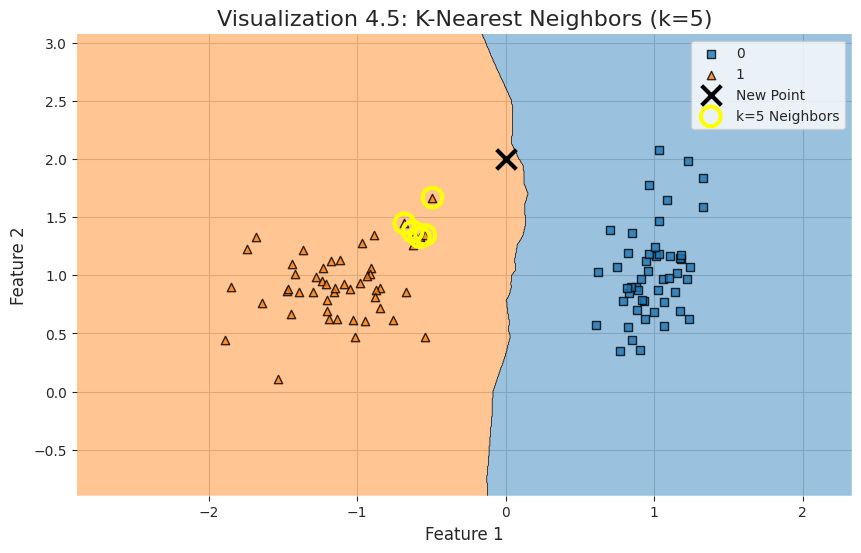

In [28]:
# 1. We use the data from 4.2
# 2. Fit a KNN model
k = 5
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_class, y_class)

# 3. Define a new point to classify
new_point = np.array([[0, 2]])

# 4. Find the k-nearest neighbors
distances, indices = model_knn.kneighbors(new_point)
neighbors = X_class[indices[0]]

# 5. Create the plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_class, y_class, clf=model_knn, legend=2)

# 6. Highlight the new point and its neighbors
plt.scatter(new_point[:, 0], new_point[:, 1], c='black', marker='x', s=200, lw=3, label='New Point')
plt.scatter(neighbors[:, 0], neighbors[:, 1], s=200, facecolors='none', edgecolors='yellow', lw=3, label=f'k={k} Neighbors')

# 7. Set titles and labels
plt.title(f"Visualization 4.5: K-Nearest Neighbors (k={k})", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.show()

## Visualization 4.6: Decision Tree Decision Boundaries

**Explanation:** This visualization shows the unique way a Decision Tree makes predictions. It creates "boxy," axis-parallel splits in the data. This is different from the single linear line of Logistic Regression or SVM.

This model is great for capturing non-linear patterns, but it can also **overfit** the data.

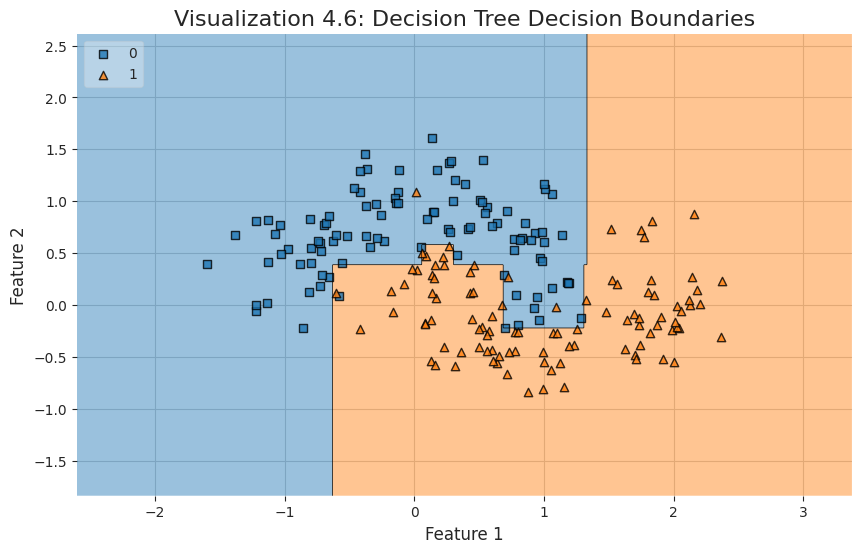

In [29]:
# 1. Create non-linear "moon" data, which is hard for linear models
X_moons, y_moons = make_moons(n_samples=200, noise=0.25, random_state=42)

# 2. Fit a Decision Tree model
# We set max_depth to avoid extreme overfitting
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_moons, y_moons)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_moons, y_moons, clf=model_dt, legend=2)

# 4. Set titles and labels
plt.title("Visualization 4.6: Decision Tree Decision Boundaries", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

## Visualization 4.7: Random Forest Decision Boundaries

**Explanation:** A Random Forest is an **ensemble** of many Decision Trees. This visualization shows the result. By averaging the predictions of hundreds of trees, the "boxy" boundaries of a single tree are smoothed out, leading to a more robust and less-overfit model.

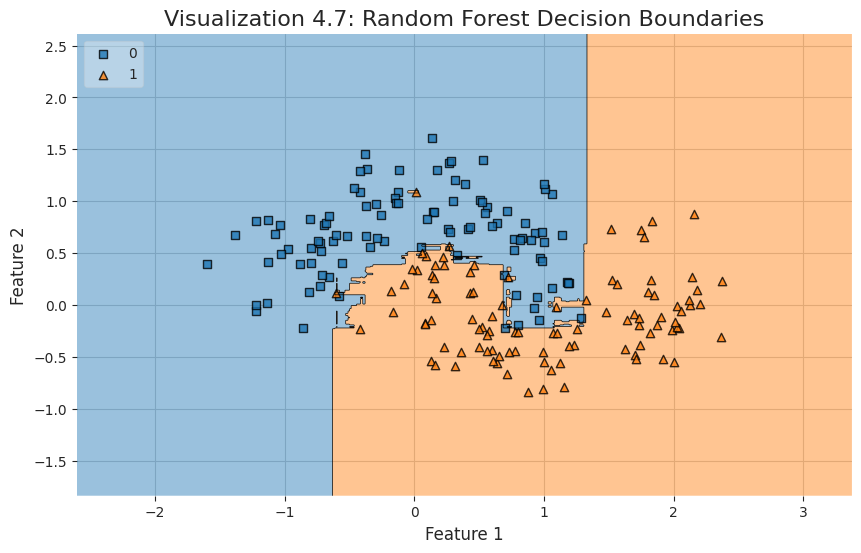

In [30]:
# 1. We use the same "moon" data from 4.6
# 2. Fit a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_moons, y_moons)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_moons, y_moons, clf=model_rf, legend=2)

# 4. Set titles and labels
plt.title("Visualization 4.7: Random Forest Decision Boundaries", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

# 5. Model Evaluation Metrics


In [31]:
# General setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Set a professional style for the book
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

## Visualization 5.1: Confusion Matrix

**Explanation:** The **Confusion Matrix** is the single most important tool for understanding classification performance. It breaks down the model's predictions into four categories:

* **True Positives (TP):** Correctly predicted as Positive.
* **True Negatives (TN):** Correctly predicted as Negative.
* **False Positives (FP):*Type I Error*. Incorrectly predicted as Positive (it was Negative).
* **False Negatives (FN):*Type II Error*. Incorrectly predicted as Negative (it was Positive).

This heatmap makes it easy to see where the model is "confused."

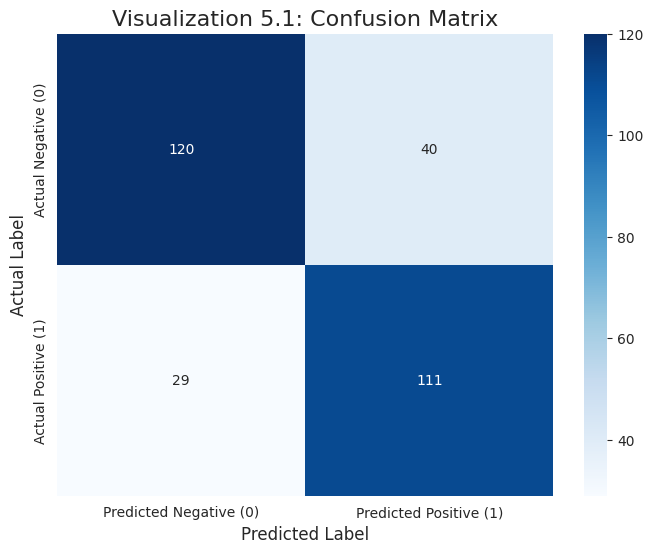

In [32]:
# 1. Create data and a model
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 2. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])

# 4. Set titles and labels
plt.title("Visualization 5.1: Confusion Matrix", fontsize=16)
plt.ylabel("Actual Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.show()

## Visualization 5.2: Receiver Operating Characteristic (ROC) Curve

**Explanation:** The **ROC Curve** is a powerful plot that shows a model's performance at all possible classification thresholds. It plots two metrics:

* **True Positive Rate (Recall):** `TP / (TP + FN)`
* **False Positive Rate:** `FP / (FP + TN)`

A model with no skill is the **dashed diagonal line (AUC = 0.5)**. A perfect model would be in the **top-left corner (AUC = 1.0)**. The **Area Under the Curve (AUC)** score gives us a single number to summarize the model's performance—the higher, the better.

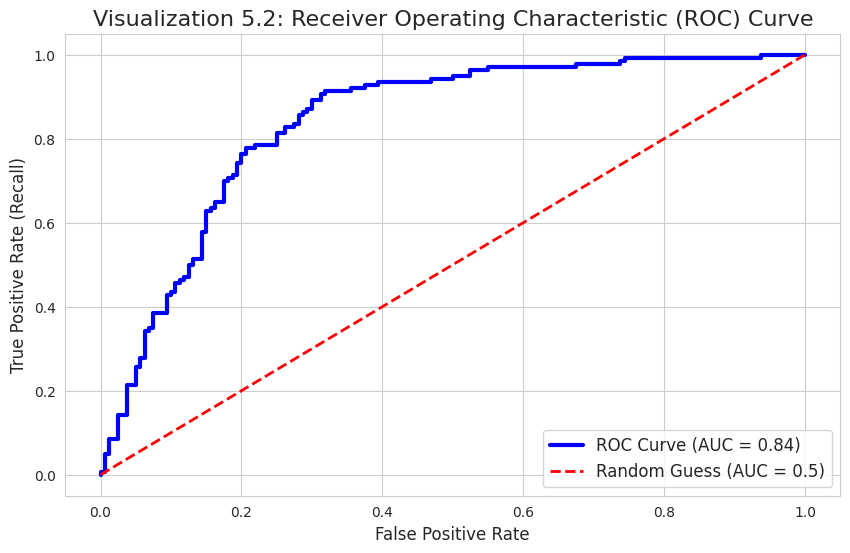

In [33]:
# 1. We need the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# 4. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')

# 5. Set titles and labels
plt.title("Visualization 5.2: Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

# 6. Unsupervised Learning (Clustering)


In [34]:
# General setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Set a professional style for the book
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Visualization 6.1: K-Means Clustering

**Explanation:** K-Means is the most popular clustering algorithm. It groups data by finding a pre-defined number of cluster centers (centroids) and assigning each point to the nearest one.

This plot shows the final result for `k=3`. The algorithm has successfully identified the three "blob" groups, and the black 'X' markers indicate the final position of the centroids for each cluster.

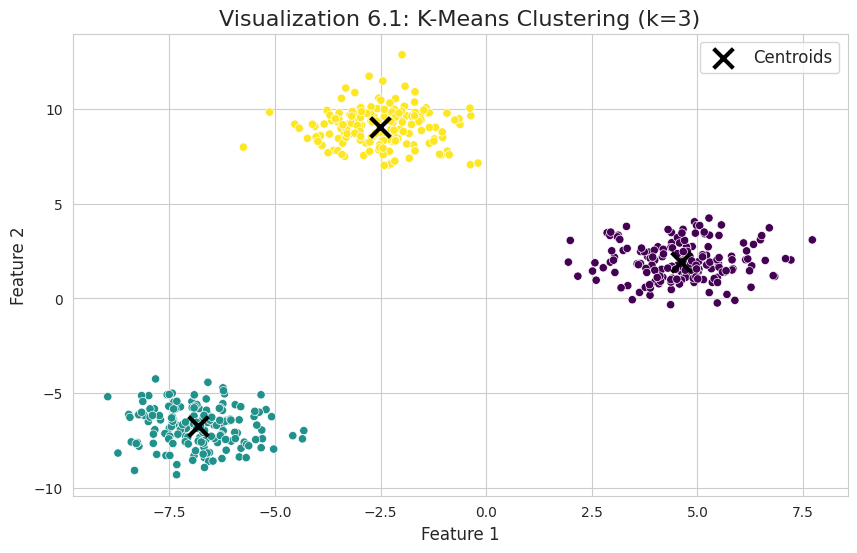

In [35]:
# 1. Create example "blob" data, perfect for K-Means
X_blobs, y_blobs = make_blobs(n_samples=500, centers=3, n_features=2,
                              random_state=42, cluster_std=1.0)

# 2. Fit a K-Means model
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_blobs)
centroids = kmeans.cluster_centers_

# 3. Create the plot
plt.figure(figsize=(10, 6))
# Plot the clustered data
sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_kmeans, palette='viridis',
                legend=False)
# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200,
            lw=3, label='Centroids')

# 4. Set titles and labels
plt.title(f"Visualization 6.1: K-Means Clustering (k={k})", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(fontsize=12)
plt.show()

## Visualization 6.2: The Elbow Method

**Explanation:** A major drawback of K-Means is that you must specify `k` (the number of clusters) beforehand. The **Elbow Method** is a common heuristic to find the optimal `k`.

We run K-Means for a range of `k` values (e.g., 1 to 10) and plot the **WCSS (Within-Cluster Sum of Squares)** for each. The WCSS is the sum of squared distances from each point to its centroid.

We look for the "elbow" point—the point where the WCSS starts to decrease much more slowly. In this plot, the elbow is clearly at `k=3`, which is the correct number of clusters for our data.

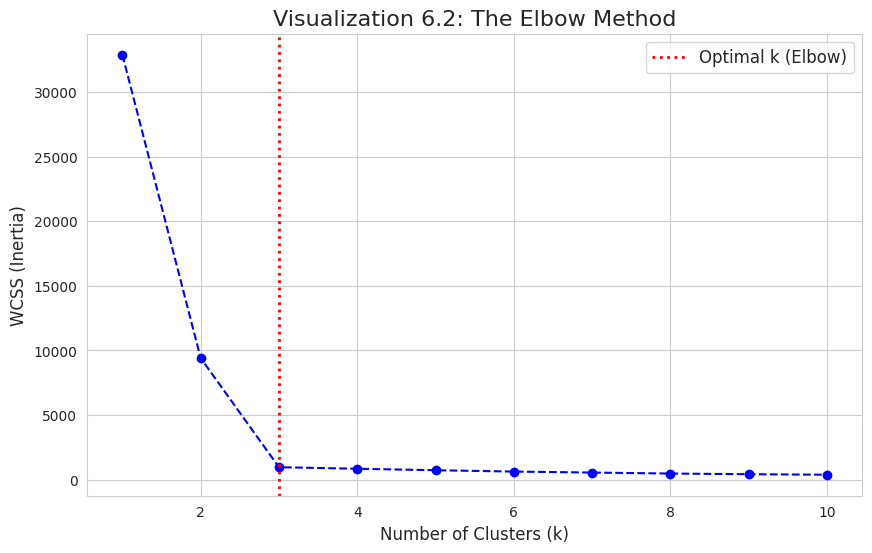

In [36]:
# 1. We use the 'X_blobs' data from 6.1
# 2. Calculate WCSS for k from 1 to 10
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_blobs)
    wcss.append(kmeans.inertia_) # .inertia_ is the WCSS value in scikit-learn

# 3. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')

# 4. Highlight the "Elbow"
plt.axvline(x=3, color='red', linestyle=':', lw=2, label='Optimal k (Elbow)')

# 5. Set titles and labels
plt.title("Visualization 6.2: The Elbow Method", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("WCSS (Inertia)", fontsize=12)
plt.legend(fontsize=12)
plt.show()

## Visualization 6.3: DBSCAN Clustering

**Explanation:** K-Means fails with non-globular (arbitrary) shapes. **DBSCAN** (Density-Based Spatial Clustering) excels here. It doesn't require `k` but instead uses `eps` (a radius) and `MinPts` to find dense areas.

Notice how it perfectly identifies the two "moon" shapes and also identifies the points far away as **Noise** (the gray 'x' markers). This is something K-Means cannot do.

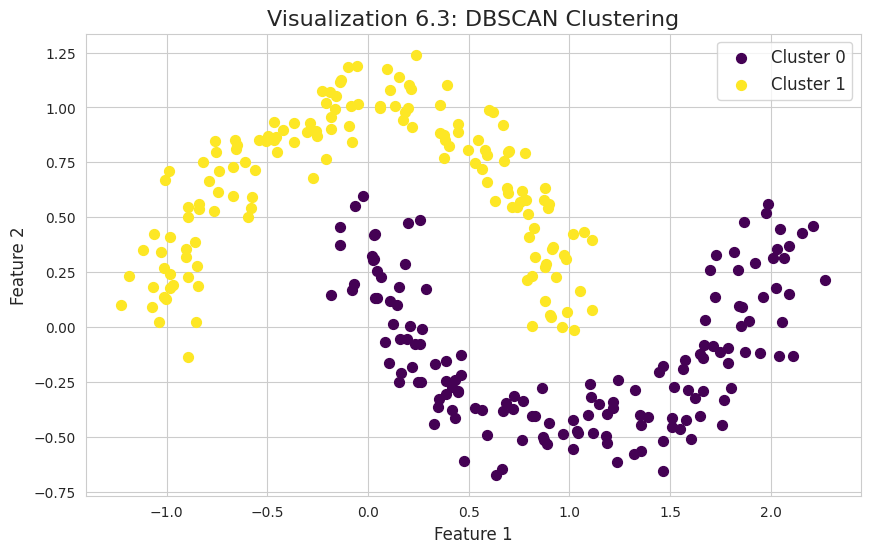

In [37]:
# 1. Create non-globular "moon" data
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. Fit a DBSCAN model
# We tune 'eps' and 'min_samples'
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

# 3. Create the plot
plt.figure(figsize=(10, 6))
# Create a custom colormap that includes gray for noise (-1)
unique_labels = np.unique(y_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
colors[np.where(unique_labels == -1)] = [0.5, 0.5, 0.5, 1] # Set noise (-1) to gray

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Plot noise as gray 'x'
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    cluster_mask = (y_dbscan == k)
    plt.scatter(X_moons[cluster_mask, 0], X_moons[cluster_mask, 1],
                c=[col], marker=marker, s=50, label=label)

# 4. Set titles and labels
plt.title("Visualization 6.3: DBSCAN Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(fontsize=12)
plt.show()

## Visualization 6.4: Silhouette Plot

**Explanation:** How do we evaluate clusters when we have no true labels? The **Silhouette Score** is a powerful metric.

* **+1:** The point is very far from other clusters (Good).
* **0:** The point is on or near the decision boundary.
* **-1:** The point is in the wrong cluster (Bad).

This plot shows the silhouette score for *every single point*, grouped by cluster. We are looking for:
1.  **High Average Score:** The red dashed line.
2.  **Uniform Thickness:** All clusters should be a similar size.
3.  **No Negative Scores:** The "knives" should not go below zero.

This plot for `k=3` looks much better than a plot for `k=2` or `k=4` would, confirming `k=3` is a good choice.

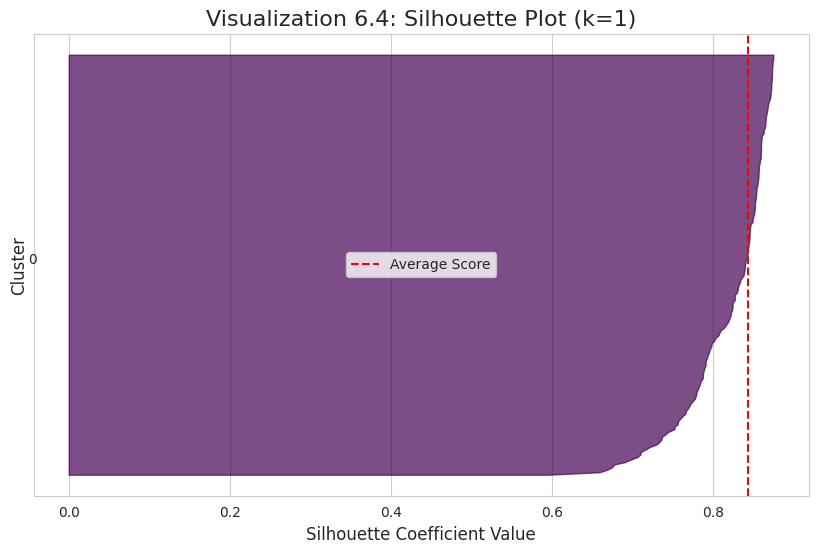

In [38]:
# 1. We use the K-Means results from 6.1 (X_blobs, y_kmeans, k=3)
# 2. Calculate silhouette scores
silhouette_avg = silhouette_score(X_blobs, y_kmeans)
sample_silhouette_values = silhouette_samples(X_blobs, y_kmeans)

# 3. Create the plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
y_lower = 10

for i in range(k):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                      ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# 4. Add the average silhouette line
ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Score")

# 5. Set titles and labels
ax1.set_title(f"Visualization 6.4: Silhouette Plot (k={k})", fontsize=16)
ax1.set_xlabel("Silhouette Coefficient Value", fontsize=12)
ax1.set_ylabel("Cluster", fontsize=12)
ax1.set_yticks([]) # Clear the y-axis labels
ax1.legend(loc='best')
plt.show()

## Visualization 6.5: Hierarchical Clustering (Dendrogram)

**Explanation:** Hierarchical Clustering builds a tree-like structure of clusters (a **dendrogram**). This is the standard way to visualize the results.

The y-axis represents the distance. You read it from the bottom up:
* At the bottom, every point is its own cluster.
* Lines merge as clusters are joined.
* The longer the vertical line, the more "dissimilar" the clusters were that got merged.

To pick the number of clusters, you "cut" the dendrogram horizontally. A cut at `y=25` (the dashed line) would result in `k=3` clusters.

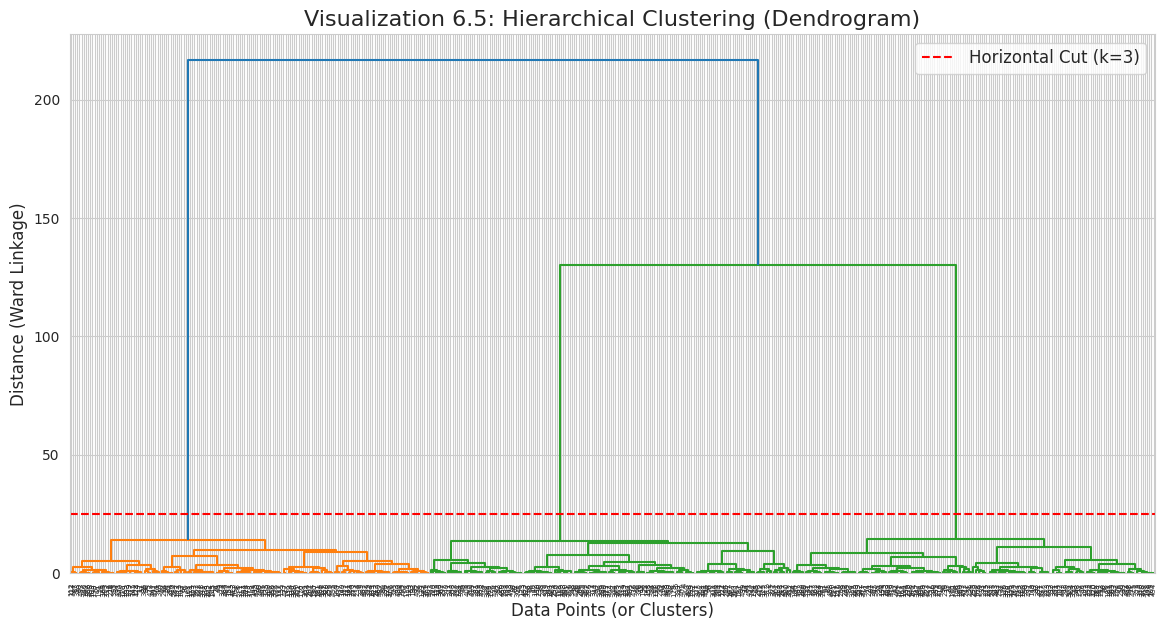

In [39]:
# 1. We use the 'X_blobs' data from 6.1
# 2. Generate the linkage matrix
# 'ward' linkage is a popular method that minimizes variance
linkage_matrix = sch.linkage(X_blobs, method='ward')

# 3. Create the plot
plt.figure(figsize=(14, 7))
dendrogram = sch.dendrogram(linkage_matrix)

# 4. Add a horizontal cut line
plt.axhline(y=25, color='red', linestyle='--', label='Horizontal Cut (k=3)')

# 5. Set titles and labels
plt.title("Visualization 6.5: Hierarchical Clustering (Dendrogram)", fontsize=16)
plt.xlabel("Data Points (or Clusters)", fontsize=12)
plt.ylabel("Distance (Ward Linkage)", fontsize=12)
plt.legend(fontsize=12)
plt.show()

# 7. Dimensionality Reduction & Recommenders


In [40]:
# General setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import norm

# Set a professional style for the book
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Visualization 7.1: PCA: Explained Variance (Scree Plot)

**Explanation:** PCA IS used for dimensionality reduction. But how do we know how many components (features) to keep?

The **Scree Plot** is the answer. It plots the percentage of variance each principal component "explains." We also plot the *cumulative* explained variance. We look for an "elbow" in the blue line or check the orange line to see how many components are needed to capture a high percentage (e.g., 95%) of the total variance.

<Figure size 1200x700 with 0 Axes>

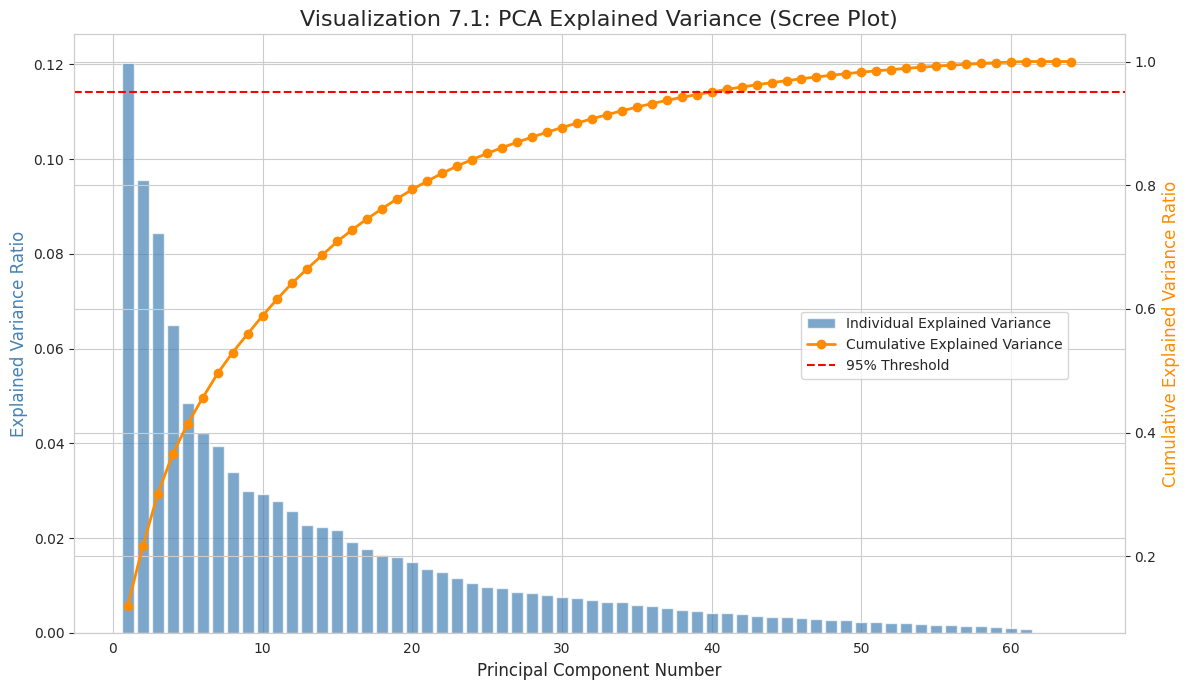

In [41]:
# 1. Load a high-dimensional dataset (e.g., digits dataset, 64 features)
digits = load_digits()
X = digits.data

# 2. Scale the data (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Calculate cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 5. Create the plot
plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot individual variance
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
        alpha=0.7, align='center', label='Individual Explained Variance', color='steelblue')
ax1.set_xlabel('Principal Component Number', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', color='steelblue', fontsize=12)

# Create a second y-axis for cumulative variance
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         label='Cumulative Explained Variance', color='darkorange', marker='o', lw=2)
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='darkorange', fontsize=12)

# 6. Add a line for 95% threshold
ax2.axhline(y=0.95, color='red', linestyle='--', label='95% Threshold')

# 7. Set titles and labels
plt.title("Visualization 7.1: PCA Explained Variance (Scree Plot)", fontsize=16)
fig.tight_layout()
fig.legend(loc='center right', bbox_to_anchor=(0.9, 0.5))
plt.show()

## Visualization 7.2: PCA: Transformed Components

**Explanation:** This plot shows the *result* of PCA. We've taken the original 64-feature digits dataset and reduced it to just two features: **Principal Component 1** and **Principal Component 2**.

We can then create a 2D scatter plot using these new components. The colors represent the *actual* digit (0-9). As you can see, even in just two dimensions, the PCA components have done a remarkable job of separating the different classes.

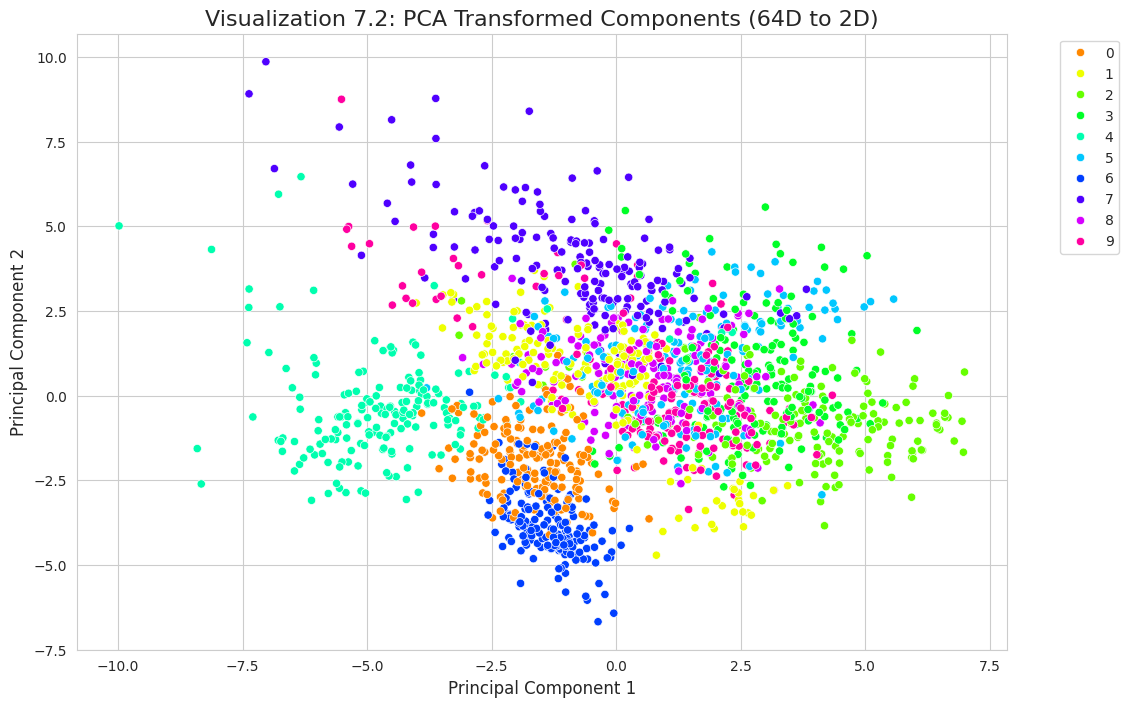

In [42]:
# 1. Fit PCA with n_components=2
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled) # Use scaled data from 7.1

# 2. Create the 2D scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=digits.target,  # Color by the actual digit
    palette=sns.color_palette("hsv", 10), # Use 10 distinct colors
    legend="full"
)

# 3. Set titles and labels
plt.title("Visualization 7.2: PCA Transformed Components (64D to 2D)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Visualization 7.3: Cosine Similarity

**Explanation:** Recommendation systems, which often rely on "Collaborative Filtering". A key part of this is measuring the similarity between users or items.

**Cosine Similarity** is a common metric that measures the *angle* between two vectors. This plot provides a simple, intuitive explanation.
* **Vector A and Vector B** are very similar. The angle ($$\theta_1$$) between them is small, so their Cosine Similarity is close to 1.
* **Vector A and Vector C** are very dissimilar. The angle ($$\theta_2$$) is large (almost 90 degrees), so their Cosine Similarity is close to 0.

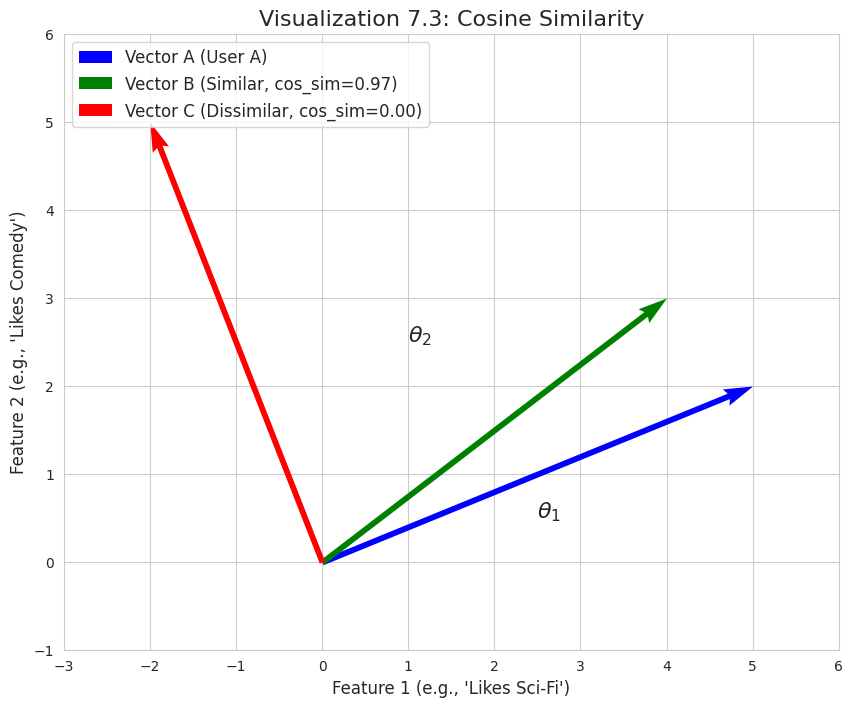

In [43]:
# 1. Define three vectors
vec_a = np.array([5, 2])
vec_b = np.array([4, 3])
vec_c = np.array([-2, 5])

# 2. Calculate cosine similarity
cos_sim_ab = np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))
cos_sim_ac = np.dot(vec_a, vec_c) / (norm(vec_a) * norm(vec_c))

# 3. Create the plot (an origin-based vector plot)
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.quiver(0, 0, vec_a[0], vec_a[1], angles='xy', scale_units='xy', scale=1,
          color='blue', label=f'Vector A (User A)')
ax.quiver(0, 0, vec_b[0], vec_b[1], angles='xy', scale_units='xy', scale=1,
          color='green', label=f'Vector B (Similar, cos_sim={cos_sim_ab:.2f})')
ax.quiver(0, 0, vec_c[0], vec_c[1], angles='xy', scale_units='xy', scale=1,
          color='red', label=f'Vector C (Dissimilar, cos_sim={cos_sim_ac:.2f})')

# 4. Add angle labels
ax.text(2.5, 0.5, '$\\theta_1$', fontsize=16)
ax.text(1.0, 2.5, '$\\theta_2$', fontsize=16)

# 5. Set titles and labels
ax.set_xlim(-3, 6)
ax.set_ylim(-1, 6)
plt.title("Visualization 7.3: Cosine Similarity", fontsize=16)
plt.xlabel("Feature 1 (e.g., 'Likes Sci-Fi')", fontsize=12)
plt.ylabel("Feature 2 (e.g., 'Likes Comedy')", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12, loc='upper left')
plt.show()